Ex. 2.1 Change the kernel used in the previous example and analyze the results. Try to use a kernel
without normalizing the values by the number of elements in the kernel. How is this altering the output
image brightness level compared to the input image?

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install PIL
!pip install opencv-python
!pip install pillow


In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


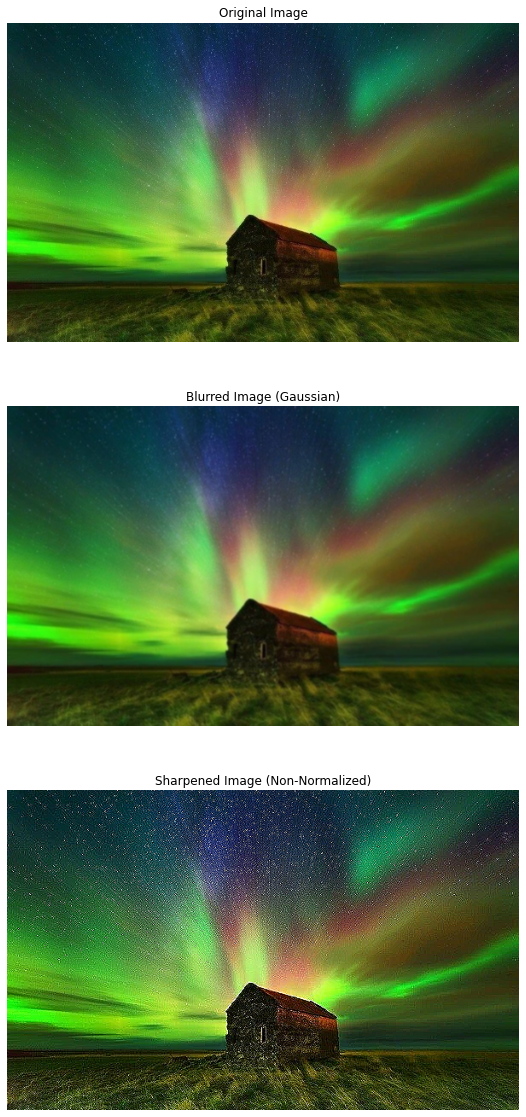

In [9]:

# Load the image using PIL
image_path = './image.png'  # Update with your image path
image_pil = Image.open(image_path).convert('RGB')
image_cv = np.array(image_pil)

# Define a normalized Gaussian kernel (for comparison)
gaussian_kernel = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16.0

# Define a non-normalized sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# Apply the normalized Gaussian kernel using cv2
blurred_image = cv2.filter2D(image_cv, -1, gaussian_kernel)

# Apply the non-normalized sharpening kernel using cv2
sharpened_image = cv2.filter2D(image_cv, -1, sharpen_kernel)

# Convert results back to PIL for visualization
blurred_image_pil = Image.fromarray(blurred_image)
sharpened_image_pil = Image.fromarray(sharpened_image)

# Display the original, blurred, and sharpened images
plt.figure(figsize=(10,20))

plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(image_pil)
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('Blurred Image (Gaussian)')
plt.imshow(blurred_image_pil)
plt.axis('off')

plt.subplot(3, 1, 3)
plt.title('Sharpened Image (Non-Normalized)')
plt.imshow(sharpened_image_pil)
plt.axis('off')

plt.show()


Ex. 2.2 Modify the previous example by testing the following kernels on the input images
“white_square.jpg” and “hop.jpg”.

In [10]:
# Load the images
image_paths = ['./hop.png', 'white_square.png']  # Update with your image paths
images = [Image.open(path).convert('RGB') for path in image_paths]
image_cv = [np.array(img) for img in images]


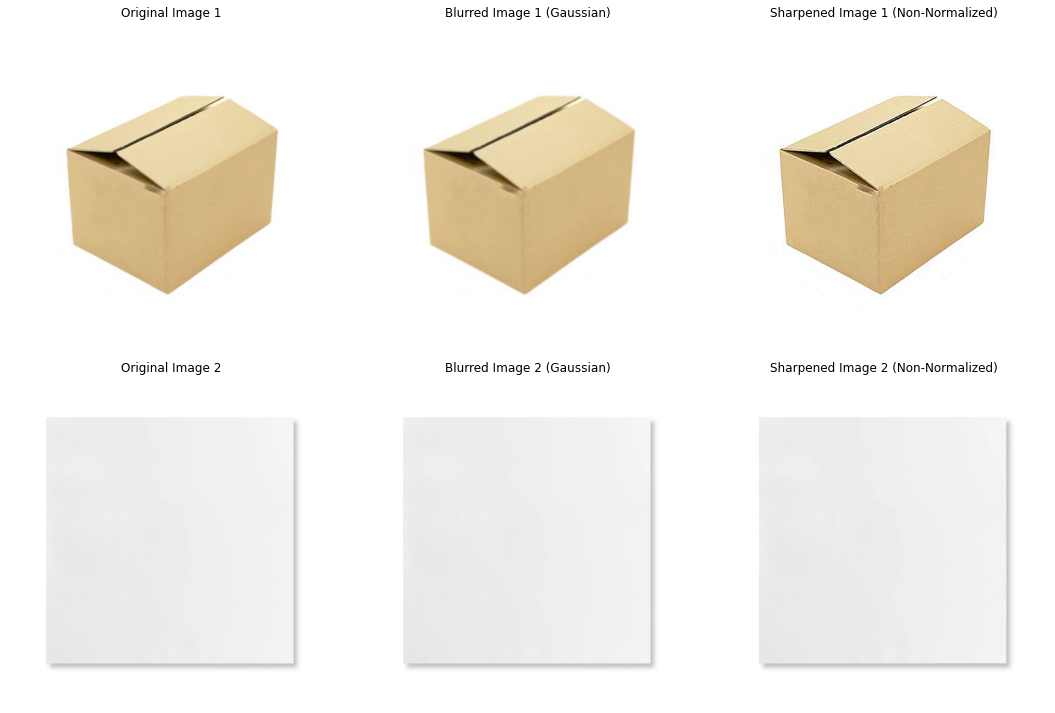

In [11]:


# Define a normalized Gaussian kernel
gaussian_kernel = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16.0

# Define a non-normalized sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# Prepare a figure for displaying results
plt.figure(figsize=(15, 10))

# Process each image
for idx, img in enumerate(image_cv):
    # Apply the normalized Gaussian kernel
    blurred_image = cv2.filter2D(img, -1, gaussian_kernel)
    
    # Apply the non-normalized sharpening kernel
    sharpened_image = cv2.filter2D(img, -1, sharpen_kernel)
    
    # Convert results back to PIL for visualization
    blurred_image_pil = Image.fromarray(blurred_image)
    sharpened_image_pil = Image.fromarray(sharpened_image)

    # Display the original, blurred, and sharpened images
    plt.subplot(2, 3, idx * 3 + 1)
    plt.title(f'Original Image {idx + 1}')
    plt.imshow(images[idx])
    plt.axis('off')

    plt.subplot(2, 3, idx * 3 + 2)
    plt.title(f'Blurred Image {idx + 1} (Gaussian)')
    plt.imshow(blurred_image_pil)
    plt.axis('off')

    plt.subplot(2, 3, idx * 3 + 3)
    plt.title(f'Sharpened Image {idx + 1} (Non-Normalized)')
    plt.imshow(sharpened_image_pil)
    plt.axis('off')

plt.tight_layout()
plt.show()


Ex. 2.3 Describe both smoothing operations in view of the final results: How much smoother
appears the logo background? How are the contours changing with the blurring kernel?